<a href="https://colab.research.google.com/github/hochangchae/aaa/blob/main/3_Logistic_Regression%2C_Lasso%2C_NN%2C_%26_SVM_F23_st.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/_AI_S24/heathcare-dataset-3.csv" )
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_encoded,ever_married_encoded,work_type_encoded,residence_type_encoded,smoking_status_encoded
0,67.0,0,1,228.69,36.6,1,1.0,1.0,2.0,1.0,1.0
1,80.0,0,1,105.92,32.5,1,1.0,1.0,2.0,0.0,2.0
2,49.0,0,0,171.23,34.4,1,0.0,1.0,2.0,1.0,3.0
3,79.0,1,0,174.12,24.0,1,0.0,1.0,3.0,0.0,2.0
4,81.0,0,0,186.21,29.0,1,1.0,1.0,2.0,1.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3915 entries, 0 to 3914
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     3915 non-null   float64
 1   hypertension            3915 non-null   int64  
 2   heart_disease           3915 non-null   int64  
 3   avg_glucose_level       3915 non-null   float64
 4   bmi                     3915 non-null   float64
 5   stroke                  3915 non-null   int64  
 6   gender_encoded          3915 non-null   float64
 7   ever_married_encoded    3915 non-null   float64
 8   work_type_encoded       3915 non-null   float64
 9   residence_type_encoded  3915 non-null   float64
 10  smoking_status_encoded  3915 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 336.6 KB


# 1. Dummy coding

In [ ]:
# Among categorical variables, the following three variables don't have a format of dummy variable, so use get_dummies method to convert them.
cols2=['gender_encoded', 'work_type_encoded', 'smoking_status_encoded']

In [ ]:
# Get_dummies method(i.e, one-hot-encoding, one-out-of-N encoding, dummy)
# There are two ways to convert data to one-hot endocidng of cateogircal variables using either pandas (get_dummies) or scikit-learn(OneHotEncoder)
  # (1) pandas (get_dummies) converts a categorical variable to dummy variables and returns a dataframe. The drop_first parameter is helpful to get k-1 dummies by removing the first level.
        # e.g.) nominal_features = pd.get_dummies(nominal_features, drop_first=True)
  # (2) OneHotEncoder does the same encoding as pandas.get_dummies, but it currently works on categorical variables that are integer
#Q1 Create dummy variables using get_dummies method
df1=pd.get_dummies (df, columns=cols2)
df1.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married_encoded,residence_type_encoded,gender_encoded_0.0,gender_encoded_1.0,gender_encoded_2.0,work_type_encoded_0.0,work_type_encoded_1.0,work_type_encoded_2.0,work_type_encoded_3.0,smoking_status_encoded_0.0,smoking_status_encoded_1.0,smoking_status_encoded_2.0,smoking_status_encoded_3.0
0,67.0,0,1,228.69,36.6,1,1.0,1.0,0,1,0,0,0,1,0,0,1,0,0
1,80.0,0,1,105.92,32.5,1,1.0,0.0,0,1,0,0,0,1,0,0,0,1,0
2,49.0,0,0,171.23,34.4,1,1.0,1.0,1,0,0,0,0,1,0,0,0,0,1
3,79.0,1,0,174.12,24.0,1,1.0,0.0,1,0,0,0,0,0,1,0,0,1,0
4,81.0,0,0,186.21,29.0,1,1.0,1.0,0,1,0,0,0,1,0,0,1,0,0


In [ ]:
# Remove the base dummy variables: gender_encoded_0.0 (Female), 'work_type_encoded_1.0'(Never_worked)'smoking_status_encoded_2.0'(Never smoked)
# Using these levels as the base dummy variables allows us to have interesting odd ratios. E.g., Odds of stroke for males vs. females. Odds of stroke for work vs. never_worked

cols3 = ['gender_encoded_0.0','work_type_encoded_1.0','smoking_status_encoded_2.0']
df1.drop(cols3, axis =1, inplace=True)

In [ ]:
df1.shape

(3915, 16)

In [ ]:
# Make sure to remove index by making index=False. Otherwise, ID will be added in the dataset, and the new variable will be used in the model to distort the results.

df1.to_csv('/content/drive/MyDrive/Colab Notebooks/healthcare-dataset-3-dummy.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/healthcare-dataset-3-dummy.csv')
df.shape

(3915, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3915 entries, 0 to 3914
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         3915 non-null   float64
 1   hypertension                3915 non-null   int64  
 2   heart_disease               3915 non-null   int64  
 3   avg_glucose_level           3915 non-null   float64
 4   bmi                         3915 non-null   float64
 5   stroke                      3915 non-null   int64  
 6   ever_married_encoded        3915 non-null   float64
 7   residence_type_encoded      3915 non-null   float64
 8   gender_encoded_1.0          3915 non-null   int64  
 9   gender_encoded_2.0          3915 non-null   int64  
 10  work_type_encoded_0.0       3915 non-null   int64  
 11  work_type_encoded_2.0       3915 non-null   int64  
 12  work_type_encoded_3.0       3915 non-null   int64  
 13  smoking_status_encoded_0.0  3915 

In [ ]:
data=df.drop(['stroke'], axis=1)
target=df['stroke']

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy=0.333, random_state=2)
data_under, target_under=undersample.fit_resample(data, target)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data_under, target_under, test_size=0.5, random_state=42, stratify=target_under)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (386, 15)
X_test shape: (386, 15)


# 2. Logistic regression

In [ ]:
#Q2 - Create a default logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report
lr=LogisticRegression(solver='lbfgs', penalty='none', random_state=0, n_jobs=-1)
model=lr.fit(X_train, y_train)
pred=model.predict(X_test)
print ("Logreg Training set score:{:.5f}".format(model.score(X_train, y_train)))
print ("Logreg Test set score:{:.5f}".format(accuracy_score(y_test, pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Logreg Training set score:0.79275
Logreg Test set score:0.75648


In [ ]:
#Q3 - Find the best mmodel using GridSearchCV
from sklearn.model_selection import GridSearchCV
params = {'solver':['lbfgs','saga'], 'penalty':['none']}
grid_lr=GridSearchCV (lr, param_grid=params, scoring ='accuracy', cv=5, n_jobs=-1)
grid_lr.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_lr.best_score_))
print("GridSearchCV best parameter:", (grid_lr.best_params_))

GridSearchCV max accuracy:0.76697
GridSearchCV best parameter: {'penalty': 'none', 'solver': 'lbfgs'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [ ]:
#Q4 - Accuracy and ROC of the best model
best_clf=grid_lr.best_estimator_
pred=best_clf.predict(X_test)

print("Logistic Regression Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test)[:, 1])
print("LR ROC AUC on test set:{:.5f}".format(ROC_AUC))

Logistic Regression Accuracy on test set:0.75648
LR ROC AUC on test set:0.77927


In [ ]:
best_clf = grid_lr.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.75648
ROC AUC on test set:0.77927


In [ ]:
print(confusion_matrix(y_test, pred))

[[249  41]
 [ 53  43]]


True Negative:249, False Negative:53, False Positive:41 True Positive:43
Accuracy: 0.76
Sensitivity(Recall): 0.45
Specificity: 0.86
Precision: 0.51
F1 score: 0.48


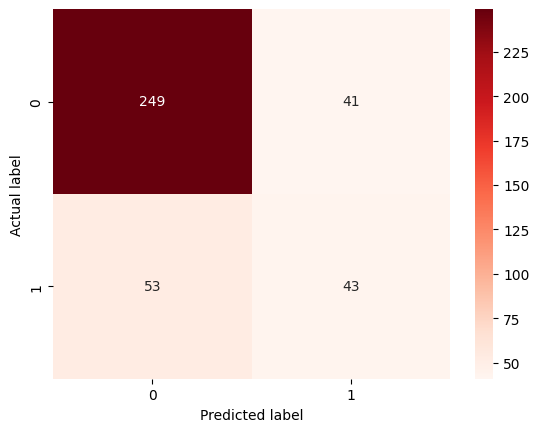

In [ ]:
CM = confusion_matrix(y_test, pred)

TN = CM[0][0]
FN = CM[1][0]
FP = CM[0][1]
TP = CM[1][1]

print('True Negative:{}, False Negative:{}, False Positive:{} True Positive:{}'.format(TN, FN, FP, TP))
s=sns.heatmap(CM, annot=True, fmt = 'g' ,cmap=plt.cm.Reds)
s.set(xlabel = 'Predicted label', ylabel ='Actual label')

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy:",round(ACC, 2))

# Sensitivity, recall, true positive rate, or hit rate
TPR = (TP/(TP+FN))
print("Sensitivity(Recall):",round(TPR, 2))

# Specificity or true negative rate
TNR = TN/(TN+FP)
print("Specificity:",round(TNR, 2))

# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision:",round(PPV, 2))

# F1 score
F1= (2*TP)/(2*TP+FP+FN)
print("F1 score:",round(F1, 2))

In [ ]:
print('intercept', np.round(best_clf.intercept_, 3))

intercept [-5.051]


In [ ]:
print('coefficients', np.round(best_clf.coef_, 3))

coefficients [[ 0.087  0.138  0.105  0.006  0.003 -0.17   0.145 -0.469  0.    -1.608
  -1.628 -1.815 -0.009 -0.359 -0.216]]


In [ ]:
feature_names=list(data.columns)
dft=pd.DataFrame(np.round(best_clf.coef_, 3).transpose(), index=feature_names, columns =["coef"])
dft1=dft.sort_values(by="coef", ascending=False)
dft1

,coef
residence_type_encoded,0.145
hypertension,0.138
heart_disease,0.105
age,0.087
avg_glucose_level,0.006
bmi,0.003
gender_encoded_2.0,0.000
smoking_status_encoded_0.0,-0.009
ever_married_encoded,-0.170
smoking_status_encoded_3.0,-0.216


In [ ]:
feature_names=list(data.columns)
dft=pd.DataFrame(np.round(np.exp(best_clf.coef_), 3).transpose(), index=feature_names, columns =["Odds_ratio"])
dft1=dft.sort_values(by="Odds_ratio", ascending=False)
dft1

,Odds_ratio
residence_type_encoded,1.156
hypertension,1.148
heart_disease,1.111
age,1.091
avg_glucose_level,1.006
bmi,1.003
gender_encoded_2.0,1.000
smoking_status_encoded_0.0,0.991
ever_married_encoded,0.844
smoking_status_encoded_3.0,0.806


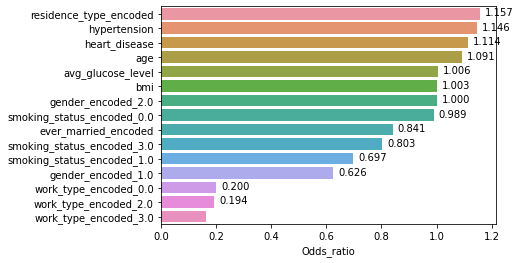

In [ ]:
ax = sns.barplot(y=dft1.index, x="Odds_ratio", data=dft1)

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()+1.2),\
                xytext=(5, 10), textcoords='offset points')

# 3. Lasso

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
ls = LogisticRegression(penalty='l1',solver='liblinear',C=1,random_state=0)
model = ls.fit(X_train, y_train)
pred = model.predict(X_test)

print ("Lasso Accuracy on training set:{:.5f}".format(model.score(X_train, y_train)))
print ("Lasso Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Lasso Accuracy on training set:0.79793
Lasso Accuracy on test set:0.76425


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

params = {'solver':['liblinear', 'saga'],
          'C':[0.01,0.05,0.1,0.2,0.3,0.5,1] }

grid_ls = GridSearchCV(ls, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1,verbose=1)
grid_ls.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_ls.best_score_))
print("GridSearchCV best parameter:", (grid_ls.best_params_))

Fitting 5 folds for each of 14 candidates, totalling 70 fits
GridSearchCV max accuracy:0.79031
GridSearchCV best parameter: {'C': 0.3, 'solver': 'liblinear'}


In [ ]:
best_clf2 = grid_ls.best_estimator_
pred2 = best_clf2.predict(X_test)
print("LASSO Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred2)))

ROC_AUC = roc_auc_score(y_test,best_clf2.predict_proba(X_test)[:, 1])
print("LASSO ROC AUC on test set:{:.5f}".format(ROC_AUC))

LASSO Accuracy on test set:0.75389
LASSO ROC AUC on test set:0.76606


In [ ]:
print(confusion_matrix(y_test, pred2))

[[257  33]
 [ 62  34]]


True Negative:257, False Negative:62, False Positive:33 True Positive:34
Accuracy: 0.75
Sensitivity(Recall): 0.35
Specificity: 0.89
Precision: 0.51
F1 score: 0.42


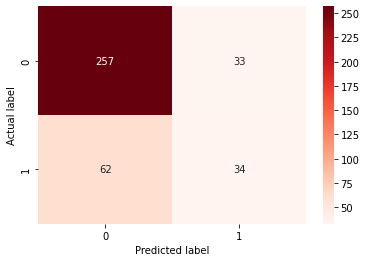

In [ ]:
CM = confusion_matrix(y_test, pred2)

TN = CM[0][0]
FN = CM[1][0]
FP = CM[0][1]
TP = CM[1][1]

print('True Negative:{}, False Negative:{}, False Positive:{} True Positive:{}'.format(TN, FN, FP, TP))
s=sns.heatmap(CM, annot=True, fmt = 'g' ,cmap=plt.cm.Reds)
s.set(xlabel = 'Predicted label', ylabel ='Actual label')

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy:",round(ACC, 2))

# Sensitivity, recall, true positive rate, or hit rate
TPR = (TP/(TP+FN))
print("Sensitivity(Recall):",round(TPR, 2))

# Specificity or true negative rate
TNR = TN/(TN+FP)
print("Specificity:",round(TNR, 2))

# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision:",round(PPV, 2))

# F1 score
F1= (2*TP)/(2*TP+FP+FN)
print("F1 score:",round(F1, 2))

In [ ]:
print('intercept', np.round(best_clf2.intercept_, 3))

intercept [-3.628]


In [ ]:
print('coefficients', np.round(best_clf2.coef_, 3))

coefficients [[ 0.062  0.     0.     0.004 -0.046  0.     0.    -0.275  0.     0.
   0.     0.     0.     0.     0.   ]]


In [ ]:
print ("Number of features used:", np.sum(best_clf2.coef_ != 0))

Number of features used: 4


In [ ]:
feature_names=list(data.columns)
dft=pd.DataFrame(np.round(best_clf2.coef_, 3).transpose(), index=feature_names, columns =["coef"])
dft1=dft.sort_values(by="coef", ascending=False)
dft1

,coef
age,0.062
avg_glucose_level,0.004
hypertension,0.000
heart_disease,0.000
ever_married_encoded,0.000
residence_type_encoded,0.000
gender_encoded_2.0,0.000
work_type_encoded_0.0,0.000
work_type_encoded_2.0,0.000
work_type_encoded_3.0,0.000


In [ ]:
feature_names=list(data.columns)
dft=pd.DataFrame(np.round(np.exp(best_clf2.coef_), 3).transpose(), index=feature_names, columns =["Odds_ratio"])
dft1=dft.sort_values(by="Odds_ratio", ascending=False)
dft1

,Odds_ratio
age,1.064
avg_glucose_level,1.004
hypertension,1.000
heart_disease,1.000
ever_married_encoded,1.000
residence_type_encoded,1.000
gender_encoded_2.0,1.000
work_type_encoded_0.0,1.000
work_type_encoded_2.0,1.000
work_type_encoded_3.0,1.000


In [ ]:
# Remove variables with odds ratio = 1 (i.e, coefficient = 0 : removed variables)
dft2 = dft1[dft1['Odds_ratio']!= 1]
dft2.shape

(4, 1)

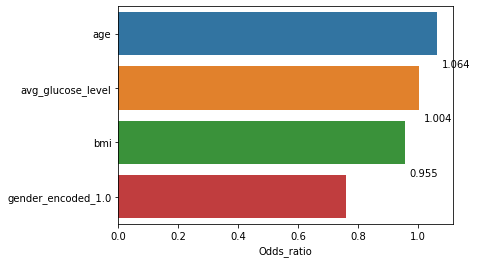

In [ ]:
ax = sns.barplot(y=dft2.index, x="Odds_ratio", data=dft2)

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()+1.2),\
                xytext=(5, 10), textcoords='offset points')

# 4. Standardize numeric varibles with StandardScaler()

In [ ]:
numeric_cols = ['age','avg_glucose_level','bmi']
df_num = df[numeric_cols]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_num_standard = pd.DataFrame(scaler.fit_transform(df_num))

In [ ]:
# StandardScaler( ) removes variable names, so create a new dataframe with variable names.
df_num_standard.columns = df_num.columns
df_num_standard.head()

,age,avg_glucose_level,bmi
0,0.969492,2.887925,0.904522
1,1.714023,0.029109,0.312804
2,-0.061397,1.549914,0.587015
3,1.656752,1.617210,-0.913930
4,1.771295,1.898738,-0.192322


In [ ]:
df_cat = df.drop(numeric_cols, axis=1) # remove the numeric variables from the original dataframe so that only categorical variables remain in the dataframe

In [ ]:
dfu_standard = pd.concat([df_num_standard, df_cat], axis=1) # Combine the new standardized numeric variables with the categorical variables.
dfu_standard.columns

Index(['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease',
       'stroke', 'ever_married_encoded', 'residence_type_encoded',
       'gender_encoded_1.0', 'gender_encoded_2.0', 'work_type_encoded_0.0',
       'work_type_encoded_2.0', 'work_type_encoded_3.0',
       'smoking_status_encoded_0.0', 'smoking_status_encoded_1.0',
       'smoking_status_encoded_3.0'],
      dtype='object')

In [ ]:
# Make sure to remove index by making index=False. Otherwise, ID will be added in the dataset, and the new variable will be used in the model to distort the results.

dfu_standard.to_csv('/content/drive/MyDrive/Colab Notebooks/stroke-standard.csv', index=False)

# 5. Rerun logistic regresssion with standardized variables

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stroke-standard.csv')
df.shape

data = df.drop(['stroke'], axis=1)
target = df['stroke']

from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy=0.333, random_state=2)
data_under, target_under = undersample.fit_resample(data, target)

In [ ]:
# 50:50 partition
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data_under, target_under, test_size=0.5, random_state=42, stratify=target_under)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (386, 15)
X_test shape: (386, 15)


In [ ]:
# Logistic Regression Default
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(solver='lbfgs',penalty='none',random_state=0,n_jobs=-1)
model = lr.fit(X_train, y_train)
pred = model.predict(X_test)

print ("Logreg Training set score:{:.5f}".format(model.score(X_train, y_train)))
print ("Logreg Test set score:{:.5f}".format(accuracy_score(y_test, pred)))

Logreg Training set score:0.79275
Logreg Test set score:0.75389


In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'solver':['lbfgs', 'saga'], 'penalty':['none']}

grid_lr = GridSearchCV(lr, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1,)
grid_lr.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_lr.best_score_))
print("GridSearchCV best parameter:", (grid_lr.best_params_))

GridSearchCV max accuracy:0.77216
GridSearchCV best parameter: {'penalty': 'none', 'solver': 'saga'}


In [ ]:
best_clf3 = grid_lr.best_estimator_
pred3 = best_clf3.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred3)))


ROC_AUC = roc_auc_score(y_test,best_clf3.predict_proba(X_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.75389
ROC AUC on test set:0.78193


True Negative:250, False Negative:55, False Positive:40 True Positive:41
Accuracy: 0.75
Sensitivity(Recall): 0.43
Specificity: 0.86
Precision: 0.51
F1 score: 0.46


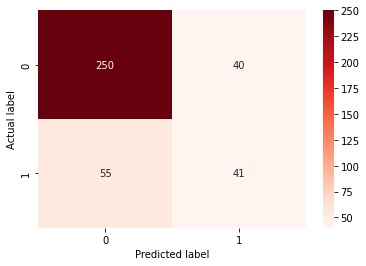

In [ ]:
CM = confusion_matrix(y_test, pred3)

TN = CM[0][0]
FN = CM[1][0]
FP = CM[0][1]
TP = CM[1][1]

print('True Negative:{}, False Negative:{}, False Positive:{} True Positive:{}'.format(TN, FN, FP, TP))
s=sns.heatmap(CM, annot=True, fmt = 'g' ,cmap=plt.cm.Reds)
s.set(xlabel = 'Predicted label', ylabel ='Actual label')

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy:",round(ACC, 2))

# Sensitivity, recall, true positive rate, or hit rate
TPR = (TP/(TP+FN))
print("Sensitivity(Recall):",round(TPR, 2))

# Specificity or true negative rate
TNR = TN/(TN+FP)
print("Specificity:",round(TNR, 2))

# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision:",round(PPV, 2))

# F1 score
F1= (2*TP)/(2*TP+FP+FN)
print("F1 score:",round(F1, 2))

# 6. Neural Network (It must use standardized variables)

In [ ]:
# Neural Network Default wtih adam solver
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report
clf_mlp = MLPClassifier(max_iter = 2000, random_state = 0)  # To avoid convergence warinng, set max_iter = 2000.

clf_mlp.fit(X_train, y_train)
pred = clf_mlp.predict(X_test)  # Use the trained Classifier to predict values
accuracy = accuracy_score(y_test, pred)

print ("Neural Network Training set score:{:.5f}".format(clf_mlp.score(X_train, y_train)))
print ("Neural Network Test set score:{:.5f}".format(accuracy_score(y_test, pred)))

Neural Network Training set score:0.98964
Neural Network Test set score:0.72280


In [ ]:
# GridSearchCV.
# alpha=0.0001 default.
# alpha=0.01 -> Medium regularization on weights
# alpha=1 -> stronger regularization on weights

from sklearn.model_selection import GridSearchCV
params = {'solver':['sgd', 'lbfgs', 'adam'],
          'alpha':[0.0001, 0.001, 0.01, 0.1, 1],
          'activation':['tanh','relu', 'logistic']
         }

grid_mlp = GridSearchCV(clf_mlp, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
grid_mlp.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_mlp.best_score_))
print("GridSearchCV best parameter:", (grid_mlp.best_params_))

GridSearchCV max accuracy:0.78505
GridSearchCV best parameter: {'activation': 'relu', 'alpha': 0.0001, 'solver': 'sgd'}


In [ ]:
best_clf = grid_mlp.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.75648
ROC AUC on test set:0.76318


True Negative:256, False Negative:60, False Positive:34 True Positive:36
Accuracy: 0.76
Sensitivity(Recall): 0.38
Specificity: 0.88
Precision: 0.51
F1 score: 0.43


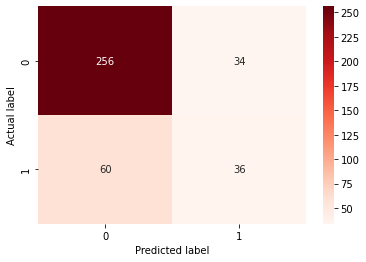

In [ ]:
CM = confusion_matrix(y_test, pred)

TN = CM[0][0]
FN = CM[1][0]
FP = CM[0][1]
TP = CM[1][1]

print('True Negative:{}, False Negative:{}, False Positive:{} True Positive:{}'.format(TN, FN, FP, TP))
s=sns.heatmap(CM, annot=True, fmt = 'g' ,cmap=plt.cm.Reds)
s.set(xlabel = 'Predicted label', ylabel ='Actual label')

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy:",round(ACC, 2))

# Sensitivity, recall, true positive rate, or hit rate
TPR = (TP/(TP+FN))
print("Sensitivity(Recall):",round(TPR, 2))

# Specificity or true negative rate
TNR = TN/(TN+FP)
print("Specificity:",round(TNR, 2))

# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision:",round(PPV, 2))

# F1 score
F1= (2*TP)/(2*TP+FP+FN)
print("F1 score:",round(F1, 2))

# 7. SVM Model (It must use standardized variables)

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1, gamma = 'auto', random_state=0, probability=True)

model = svm.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print ("SVM Accuracy on training set:{:.5f}".format(model.score(X_train, y_train)))
print ("SVM Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

SVM Accuracy on training set:0.80311
SVM Accuracy on test set:0.77202


In [ ]:
params = {'kernel':['rbf','sigmoid'], 'C':[0.0001, 0.01, 1, 10],\
         'gamma':['auto','scale']}

grid_svm = GridSearchCV(svm, param_grid=params, scoring='accuracy', cv=3, n_jobs=-1)
grid_svm.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_svm.best_score_))
print("GridSearchCV best parameter:", (grid_svm.best_params_))


GridSearchCV max accuracy:0.77473
GridSearchCV best parameter: {'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}


In [ ]:
best_clf4 = grid_svm.best_estimator_
pred4 = best_clf4.predict(X_test)
print("SVM Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred4)))

ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test)[:, 1])
print("SVM ROC AUC on test set:{:.5f}".format(ROC_AUC))

SVM Accuracy on test set:0.73316
SVM ROC AUC on test set:0.64504


True Negative:252, False Negative:65, False Positive:38 True Positive:31
Accuracy: 0.73
Sensitivity(Recall): 0.32
Specificity: 0.87
Precision: 0.45
F1 score: 0.38


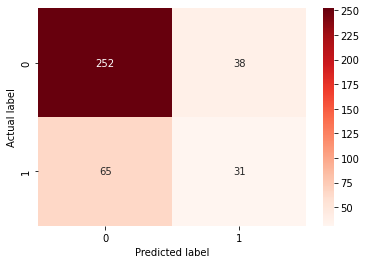

In [ ]:
CM = confusion_matrix(y_test, pred4)

TN = CM[0][0]
FN = CM[1][0]
FP = CM[0][1]
TP = CM[1][1]

print('True Negative:{}, False Negative:{}, False Positive:{} True Positive:{}'.format(TN, FN, FP, TP))
s=sns.heatmap(CM, annot=True, fmt = 'g' ,cmap=plt.cm.Reds)
s.set(xlabel = 'Predicted label', ylabel ='Actual label')

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy:",round(ACC, 2))

# Sensitivity, recall, true positive rate, or hit rate
TPR = (TP/(TP+FN))
print("Sensitivity(Recall):",round(TPR, 2))

# Specificity or true negative rate
TNR = TN/(TN+FP)
print("Specificity:",round(TNR, 2))

# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision:",round(PPV, 2))

# F1 score
F1= (2*TP)/(2*TP+FP+FN)
print("F1 score:",round(F1, 2))